Example complicated lactam analysis.

The input cores are generic in atoms and bonds, the system figures out the correct cores for grouping purposes.

This may be overkill ( and certainly takes a long enough time ).  What the algorithm is doing is first mapping each core to each other and then trying to optimizes the side chain selection across all sets.  I.e. it tries to make the matching choices such that all R1's are the same, all R2's are the same and so on.

**n.b.** *It is important that the cores are input in most to least specific as the RGroupDecomposition takes the first matching core.*

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


In [12]:
cores = OrderedDict()

cores['six'] = Chem.MolFromSmarts('[#8]-[#6](=O)-*~1~*~*~*~*~2-[#6]-[#6](=O)-*~1~2')
cores['five'] = Chem.MolFromSmarts('[#8]-[#6](=O)-*~1~*~*~*~2-[#6]-[#6](=O)-*~1~2')


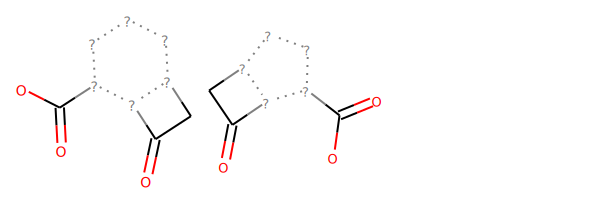

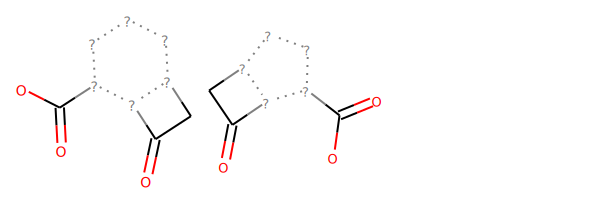

In [13]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(cores.values())

In [16]:
rg = RGroupDecomposition(cores.values())

mols = []
count = 0
maxEasy = -1
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        idx1 = maxEasy = max(maxEasy,rg.Add(m))
        if count % 1000 == 0:
            print("Added", count, maxEasy)

print ("Added %s to RGroup Easy Decomposition out of %s"%(idx1, count))

Added 100 85
AddedAdded 100 85
Added 200 178
Added 200 178
Added 300 265
Added 300 265
Added 400 345
Added 400 345
Added 500 393
Added 500 393
Added 600 479
Added 600 479
Added 700 558
Added 700 558
Added 800 615
Added 800 615
Added 900 714
Added 900 714
Added 1000 771
Added 1000 771
Added 1100 827
Added 1100 827
Added 1200 856
Added 1200 856
Added 1300 944
Added 1300 944
Added 1400 1023
Added 1400 1023
Added 1500 1107
Added 1500 1107
Added 1600 1134
Added 1600 1134
Added 1700 1194
Added 1700 1194
Added 1800 1263
Added 1800 1263
Added 1900 1293
Added 1900 1293
Added 2000 1356
Added 2000 1356
Added 2100 1435
Added 2100 1435
Added 2200 1473
Added 2200 1473
Added 2300 1555
Added 2300 1555
Added 2400 1582
Added 2400 1582
Added 2500 1603
Added 2500 1603
Added 2600 1620
Added 2600 1620
Added 2700 1682
Added 2700 1682
Added 2800 1719
Added 2800 1719
Added 2900 1735
Added 2900 1735
Added 3000 1747
Added 3000 1747
Added 3100 1828
Added 3100 1828
Added 3200 1890
Added 3200 1890
Added 3300 1936
A

RDKit ERROR: [13:36:40] SMILES Parse Error: syntax error for input: 'CANONICAL_SMILES'


 4300 2271
Added 2309 to RGroup Easy Decomposition out of 4340


RDKit ERROR: [13:36:40] SMILES Parse Error: syntax error for input: 'CANONICAL_SMILES'


In [17]:
rg.Process()

True

True

Rendering this many molecules is pretty taxing for the current system, this takes a while.

In [18]:
from rdkit import rdBase
rdBase.DisableLog("rdApp.*")

In [19]:
frame = pd.DataFrame(rg.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)

In [ ]:
frame